<a href="https://colab.research.google.com/github/lhrong16/WIA1006-Machine-Learning/blob/main/week02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Practical Week 2 (Data Pre-processing & Cleansing)**

1. Handle Missing Data
* Removing of data (Banking_Marketing.csv)
* Imputation (Banking_Marketing.csv)
* Removing Outliers (german_credit_data.csv)

2. Data Integration (student.csv & marks.csv)

3. Data Transformation
* Replacement of Categorical Data with Numbers (student.csv)
* Label encoding (Banking_Marketing.csv)
* Transforming Data of Different Scale (Wholesale customers data.csv)

4. Data Discretization (Student_bucketing.csv)

In [6]:
# Line Wrapping in Collaboratory Google results
# put this in the first cell of your notebook

from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

## Mount Google Drive


Important: Remember to re-mount for each time a new dataset is added to Google Drive

In [7]:
import io
import requests
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## 1. Handle Missing Data

- Removing of data (Banking_Marketing.csv)
- Imputation (Banking_Marketing.csv)
- Removing Outliers (german_credit_data.csv)

In [8]:
# Import dataset
import pandas as pd
DATA_DIR_1 = "/content/drive/MyDrive/WIA1006 Machine Learning (Data Preprocessing and Cleaning))/Banking_Marketing.csv"
Banking_Marketing_df = pd.read_csv (DATA_DIR_1, header=0)

## 1.1 - Removing of Data

In [9]:
# Determine the datatype of Each Column by using dtypes
print (Banking_Marketing_df.dtypes)

age               float64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration          float64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object


In [10]:
print("Find missing value of each column using isna()")
print (Banking_Marketing_df.isna().sum())

Find missing value of each column using isna()
age               2
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           6
month             0
day_of_week       0
duration          7
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64


In [11]:
print("\nRemove all rows with missing data by using dropna()")
data = Banking_Marketing_df.dropna ()
print(data.isna().sum())


Remove all rows with missing data by using dropna()
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64


In [12]:
print(Banking_Marketing_df.isna().sum())

age               2
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           6
month             0
day_of_week       0
duration          7
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64


## 1.2 - Imputation

Dataset: Banking_Marketing.csv

In [13]:
# Computation of the Mean value by using mean ()
mean_age = Banking_Marketing_df.age.mean ()
print()
print ("Mean age: %.2f" % mean_age)

# Impute the missing data with its mean by using fillna ()
Banking_Marketing_df.age.fillna(mean_age, inplace=True)
print("\nImpute missing data with mean value:")
print (Banking_Marketing_df.isna().sum())


Mean age: 40.02

Impute missing data with mean value:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           6
month             0
day_of_week       0
duration          7
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64


<ipython-input-13-bec04e9785bd>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Banking_Marketing_df.age.fillna(mean_age, inplace=True)


In [14]:
# Computation of Median value by using median ()
# used median because the 'duration' variable is too diverse
median_duration = Banking_Marketing_df.duration.median()
print ("\nMedian duration: %.2f" % median_duration)

# Impute the missing data with its median by using fillna ()
Banking_Marketing_df.duration.fillna(median_duration, inplace=True)
print("\nImpute missing data with median value:")
print (Banking_Marketing_df.isna().sum())


Median duration: 180.00

Impute missing data with median value:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           6
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64


<ipython-input-14-b70db2655b5e>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Banking_Marketing_df.duration.fillna(median_duration, inplace=True)


In [15]:
# Computation of the Mean value by using mean ()
mean_age = Banking_Marketing_df.age.mean ()
print()
print ("Mean age: %.2f" % mean_age)

# Impute the missing data with its mean by using fillna ()
Banking_Marketing_df.age.fillna(mean_age, inplace=True)
print("\nImpute missing data with mean value:")
print (Banking_Marketing_df.isna().sum())

# Computation of Median value by using median ()
# used median because the 'duration' variable is too diverse
median_duration = Banking_Marketing_df.duration.median()
print ("\nMedian duration: %.2f" % median_duration)

# Impute the missing data with its median by using fillna ()
Banking_Marketing_df.duration.fillna(median_duration, inplace=True)
print("\nImpute missing data with median value:")
print (Banking_Marketing_df.isna().sum())

# Impute Categorical Data with its mode by using mode ()
# find out the mode
mode_contact = Banking_Marketing_df.contact.mode()[0]
print("\nImpute categorical data with its mode:")
print (mode_contact)

# impute using fillna. Used mode to find the most popular contact
Banking_Marketing_df.contact.fillna (mode_contact, inplace = True)
print("\nImpute missing data with mode (most popular contact):")
print (Banking_Marketing_df.isna().sum())


Mean age: 40.02

Impute missing data with mean value:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           6
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

Median duration: 180.00

Impute missing data with median value:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           6
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

Impute catego

<ipython-input-15-3e8c2878a846>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Banking_Marketing_df.age.fillna(mean_age, inplace=True)
<ipython-input-15-3e8c2878a846>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

## 1.3 - Removing Outliers

Dataset: german_credit_data.csv

In [16]:
DATA_DIR_2 = "/content/drive/MyDrive/WIA1006 Machine Learning (Data Preprocessing and Cleaning))/german_credit_card.csv"
german_credit_df = pd.read_csv (DATA_DIR_2, header=0)

In [17]:
german_credit_df.shape

(1000, 11)

IQR: 15.00
Lower_Fence: 4.50
Upper_Fence: 64.50

Display Outliers
     Unnamed: 0  Unnamed: 1  Age     Sex  Job Housing Saving accounts  \
0           NaN           0   67    male    2     own             NaN   
75          NaN          75   66    male    3    free          little   
137         NaN         137   66    male    1     own      quite rich   
163         NaN         163   70    male    3    free          little   
179         NaN         179   65    male    2     own          little   
186         NaN         186   74  female    3    free          little   
187         NaN         187   68    male    0    free          little   
213         NaN         213   66    male    3     own          little   
330         NaN         330   75    male    3    free          little   
430         NaN         430   74    male    1     own          little   
438         NaN         438   65    male    0     own          little   
536         NaN         536   75  female    3     own     

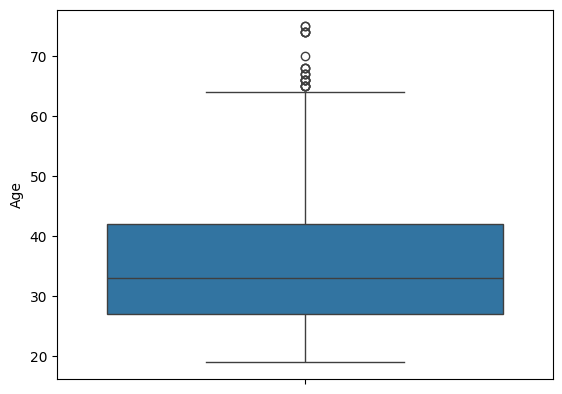

In [18]:
# Display a BoxPlot
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sbn
sbn.boxplot(german_credit_df['Age'])

# Compute the Interquartile Range (IQR)
Q1 = german_credit_df['Age'].quantile(0.25)
Q3 = german_credit_df['Age'].quantile(0.75)
IQR = Q3 - Q1
print ("IQR: %.2f" %IQR)

# Calculate the Lower and Upper Fence
Lower_Fence = Q1 - (1.5 * IQR)
print ("Lower_Fence: %.2f" %Lower_Fence)
Upper_Fence = Q3 + (1.5 * IQR)
print ("Upper_Fence: %.2f" %Upper_Fence)

# Display Outliers and Filtering Out the Outliers
print("\nDisplay Outliers")
print (german_credit_df[((german_credit_df["Age"] < Lower_Fence) | (german_credit_df["Age"] > Upper_Fence))])

# display data with outliers filtered out, use ~ to filter
print("\nDisplay data without outliers")
print (german_credit_df[~((german_credit_df["Age"] < Lower_Fence) | (german_credit_df["Age"] > Upper_Fence))])

### Why Seaborn Boxplot still showing outliers, after removing the outliers?

Seaborn uses inter-quartile range to detect the outliers. When you remove outliers, the number of data changes thus its quantile changes
*   means lower range and upper range changes
* thus it is again showing outliers

Let's investigate by computing a new quantile range after remove the outliers.

Before remove outliers:
* IQR: 15.00
* Lower_Fence: 4.50
* Upper_Fence: 64.50

After remove outliers:
* IQRb: 14.00
* Lower_Fence_b: 6.00
* Upper_Fence_b: 63.00

The new upper fence now is at 63, if you check the condition based on the new upper and lower fence, you will see there a 5 rows with outliers (german_credit_remOutliers["Age"] < Lower_Fence_b) | (german_credit_remOutliers["Age"] > Upper_Fence_b)

But if you check the condition against the firstly calculated upper and lower fence, you will get an empty array print (german_credit_remOutliers[((german_credit_remOutliers["Age"] < Lower_Fence) | (german_credit_remOutliers["Age"] > Upper_Fence))])

What does it mean?

The outliers are actually removed (for the attribute age of the dataframe), but Seaborn boxplot shows the outliers based on the newly calculated inter-quartile range.

In [19]:
german_credit_remOutliers = (german_credit_df[~((german_credit_df["Age"] < Lower_Fence) | (german_credit_df["Age"] > Upper_Fence))])
german_credit_remOutliers.shape

(977, 11)

In [20]:
# Compute new quantile range after remove outliers
# Compute the Interquartile Range (IQR)
Q1b = german_credit_remOutliers['Age'].quantile(0.25)
Q3b = german_credit_remOutliers['Age'].quantile(0.75)
IQRb = Q3b - Q1b
print ("IQRb: %.2f" %IQRb)

# Calculate the Lower and Upper Fence
Lower_Fence_b = Q1b - (1.5 * IQRb)
print ("Lower_Fence: %.2f" %Lower_Fence_b)
Upper_Fence_b = Q3 + (1.5 * IQRb)
print ("Upper_Fence: %.2f" %Upper_Fence_b)

IQRb: 14.00
Lower_Fence: 6.00
Upper_Fence: 63.00


<Axes: ylabel='Age'>

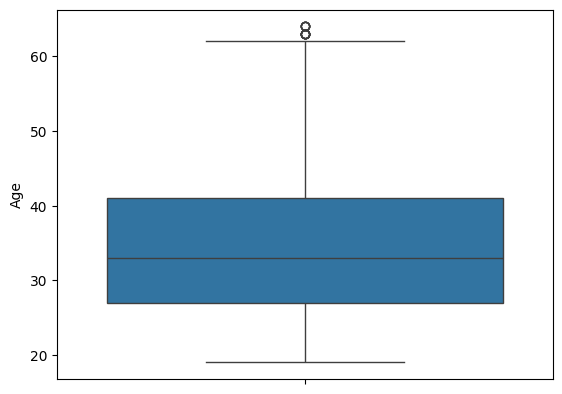

In [21]:
sbn.boxplot(german_credit_remOutliers['Age'])
# Use showfliers=False if you want to disable outliers from boxplot

In [22]:
# Check condition based on the firstly calculated IQR → results return empty df
# Display Outliers and Filtering Out the Outliers
print("\nDisplay Outliers")
print (german_credit_remOutliers[((german_credit_remOutliers["Age"] < Lower_Fence) | (german_credit_remOutliers["Age"] > Upper_Fence))])


Display Outliers
Empty DataFrame
Columns: [Unnamed: 0, Unnamed: 1, Age, Sex, Job, Housing, Saving accounts, Checking account, Credit amount, Duration, Purpose]
Index: []


In [23]:
# Check condition based on the newly calculated IQR → results return 5 rows with outliers
# Note that the age 64 > new upper fence 63
# Display Outliers and Filtering Out the Outliers
print("\nDisplay Outliers")
print (german_credit_remOutliers[((german_credit_remOutliers["Age"] < Lower_Fence_b) | (german_credit_remOutliers["Age"] > Upper_Fence_b))])


Display Outliers
     Unnamed: 0  Unnamed: 1  Age     Sex  Job Housing Saving accounts  \
219         NaN         219   64  female    2     own          little   
629         NaN         629   64    male    1     own             NaN   
678         NaN         678   64    male    1    rent          little   
976         NaN         976   64  female    2     own          little   
987         NaN         987   64  female    2     own        moderate   

    Checking account  Credit amount  Duration    Purpose  
219              NaN           1364        10        car  
629              NaN           3832         9  education  
678           little           2384        24   radio/TV  
976         moderate            753         6   radio/TV  
987              NaN           1409        13   radio/TV  


## 2. Data Integration

Dataset:

1. student.csv
2. marks.csv

In [24]:
# Import dataset
import pandas as pd
DATA_DIR_3 = "/content/drive/MyDrive/WIA1006 Machine Learning (Data Preprocessing and Cleaning))/student.csv"
DATA_DIR_4 = "/content/drive/MyDrive/WIA1006 Machine Learning (Data Preprocessing and Cleaning))/mark.csv"
student_df = pd.read_csv (DATA_DIR_3, header=0)
marks_df = pd.read_csv (DATA_DIR_4, header=0)

In [25]:
#Checking of Data
print (student_df.head())
print (marks_df.head())

# Merging of DataFrame using the pd.merge ()
df = pd.merge(student_df, marks_df, on = "Student_id")
print (df.head (10))

   Student_id  Age  Gender      Grade Employed
0           1   19    Male  1st Class      yes
1           2   20  Female  2nd Class       no
2           3   18    Male  1st Class       no
3           4   21  Female  2nd Class       no
4           5   19    Male  1st Class       no
   Student_id  Mark     City
0           1    95  Chennai
1           2    70    Delhi
2           3    98   Mumbai
3           4    75     Pune
4           5    89    Kochi
   Student_id  Age  Gender      Grade Employed  Mark     City
0           1   19    Male  1st Class      yes    95  Chennai
1           2   20  Female  2nd Class       no    70    Delhi
2           3   18    Male  1st Class       no    98   Mumbai
3           4   21  Female  2nd Class       no    75     Pune
4           5   19    Male  1st Class       no    89    Kochi
5           6   20    Male  2nd Class      yes    69  Gwalior
6           7   19  Female  3rd Class      yes    52   Bhopal
7           8   21    Male  3rd Class      yes  

## 3. Data Transformation

* Replacement of Categorical Data with Numbers (student.csv)
* Label encoding (Banking_Marketing.csv)
* Transforming Data of Different Scale (Wholesale customers data.csv)

Numerical Data
* Discrete: Numerical data that is countable
* Continuous: Numerical data that is measurable

Categorical Data
* Ordered: Categorical data that is orderly or structured
* Nominal: Categorical data that has no order or structure

Dataset:
1. student.csv
2. Banking_Marketing.csv
3. Wholesale customers data.csv

In [26]:
import numpy as np

# Separating Categorical Columns from Dataframe using select_dtypes()
df_categorical = student_df.select_dtypes(exclude=[np.number]) # exclude numerical using numpy
print(df_categorical)

     Gender      Grade Employed
0      Male  1st Class      yes
1    Female  2nd Class       no
2      Male  1st Class       no
3    Female  2nd Class       no
4      Male  1st Class       no
..      ...        ...      ...
227  Female  1st Class       no
228    Male  2nd Class       no
229    Male  3rd Class      yes
230  Female  1st Class      yes
231    Male  3rd Class      yes

[232 rows x 3 columns]


Finding the Frequency of Distribution to Each Categorical Column

In [27]:
print(df_categorical['Grade'].unique())

['1st Class' '2nd Class' '3rd Class']


In [28]:
print(df_categorical.Grade.value_counts())

Grade
2nd Class    80
3rd Class    80
1st Class    72
Name: count, dtype: int64


In [29]:
print(df_categorical.Gender.value_counts())

Gender
Male      136
Female     96
Name: count, dtype: int64


In [30]:
print(df_categorical.Employed.value_counts())

Employed
no     133
yes     99
Name: count, dtype: int64


## 3.1 - Replacing Categorical Data with Numbers

The following code may produce warning, but it's okay, still able to replace categorical data with numbers.

Warning:

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https: ...

In [31]:
df_categorical.Grade.replace({"1st Class": 1, "2nd Class": 2, "3rd Class": 3 }, inplace=True)

<ipython-input-31-99e940c07b7b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_categorical.Grade.replace({"1st Class": 1, "2nd Class": 2, "3rd Class": 3 }, inplace=True)
<ipython-input-31-99e940c07b7b>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_categorical.Grade.replace({"1st Class": 1

In [32]:
df_categorical.Gender.replace({"Male": 0, "Female": 1}, inplace=True)

<ipython-input-32-6536e30772fd>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_categorical.Gender.replace({"Male": 0, "Female": 1}, inplace=True)
<ipython-input-32-6536e30772fd>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_categorical.Gender.replace({"Male": 0, "Female": 1}, inplace=True

In [33]:
df_categorical.Employed.replace({"yes": 1, "no": 2}, inplace=True)
print (df_categorical.head())

   Gender  Grade  Employed
0       0      1         1
1       1      2         2
2       0      1         2
3       1      2         2
4       0      1         2


<ipython-input-33-cfb9d68b434d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_categorical.Employed.replace({"yes": 1, "no": 2}, inplace=True)
<ipython-input-33-cfb9d68b434d>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_categorical.Employed.replace({"yes": 1, "no": 2}, inplace=True)


## 3.2 - Label Encoding

This technique is used to replace each value in a categorical column with numbers from 0 to N-1.

Dataset:

* Banking_Marketing.csv
(this dataset already imported previously and used as 'Banking_Marketing_df')

In [34]:
# Read Dataset and import LabelEncoder from sklearn.preprocessing package
from sklearn.preprocessing import LabelEncoder

print (Banking_Marketing_df.head())

    age          job  marital          education  default housing loan  \
0  44.0  blue-collar  married           basic.4y  unknown     yes   no   
1  53.0   technician  married            unknown       no      no   no   
2  28.0   management   single  university.degree       no     yes   no   
3  39.0     services  married        high.school       no      no   no   
4  55.0      retired  married           basic.4y       no     yes   no   

    contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0  cellular   aug         thu  ...         1    999         0  nonexistent   
1  cellular   nov         fri  ...         1    999         0  nonexistent   
2  cellular   jun         thu  ...         3      6         2      success   
3  cellular   apr         fri  ...         2    999         0  nonexistent   
4  cellular   aug         fri  ...         1      3         1      success   

  emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  nr_employed  y  
0          

In [35]:
# Remove Missing Data
Banking_Marketing_df = Banking_Marketing_df.dropna()

In [36]:
# Select Non-Numerical Columns
data_column_category = Banking_Marketing_df.select_dtypes (exclude=[np.number]).columns
print (data_column_category)
print (Banking_Marketing_df[data_column_category].head())

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')
           job  marital          education  default housing loan   contact  \
0  blue-collar  married           basic.4y  unknown     yes   no  cellular   
1   technician  married            unknown       no      no   no  cellular   
2   management   single  university.degree       no     yes   no  cellular   
3     services  married        high.school       no      no   no  cellular   
4      retired  married           basic.4y       no     yes   no  cellular   

  month day_of_week     poutcome  
0   aug         thu  nonexistent  
1   nov         fri  nonexistent  
2   jun         thu      success  
3   apr         fri  nonexistent  
4   aug         fri      success  


In [37]:
# Iterate through column to convert to numeric data using LabelEncoder ()
label_encoder = LabelEncoder()
for i in data_column_category:
    Banking_Marketing_df[i] = label_encoder.fit_transform (Banking_Marketing_df[i])

In [38]:
print("Label Encoder Data:")
print(Banking_Marketing_df.head())

Label Encoder Data:
    age  job  marital  education  default  housing  loan  contact  month  \
0  44.0    1        1          1        1        2     1        0      1   
1  53.0    9        1          8        0        0     1        0      7   
2  28.0    4        2          7        0        2     1        0      4   
3  39.0    7        1          4        0        0     1        0      0   
4  55.0    5        1          1        0        2     1        0      1   

   day_of_week  ...  campaign  pdays  previous  poutcome  emp_var_rate  \
0            2  ...         1    999         0         1           1.4   
1            0  ...         1    999         0         1          -0.1   
2            2  ...         3      6         2         2          -1.7   
3            0  ...         2    999         0         1          -1.8   
4            0  ...         1      3         1         2          -2.9   

   cons_price_idx  cons_conf_idx  euribor3m  nr_employed  y  
0          93.44

## 3.3 - Transforming Data of Different Scale

Dataset:
* Wholesale customers data.csv

In [39]:
DATA_DIR_5 = "/content/gdrive/MyDrive/Colab Notebooks/210412-ITS70304/Wholesale customers data.csv"

In [40]:
# Read Dataset
from sklearn import preprocessing
WholesaleData_df = pd.read_csv (DATA_DIR_5, header=0)
print (WholesaleData_df.head())

FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/Colab Notebooks/210412-ITS70304/Wholesale customers data.csv'

In [ ]:
null_ = WholesaleData_df.isna().any()

In [ ]:
dtypes = WholesaleData_df.dtypes

In [ ]:
# Check for Missing Data
null_ = WholesaleData_df.isna().any()
dtypes = WholesaleData_df.dtypes
info = pd.concat ([null_,dtypes], axis = 1, keys = ['Null', 'type'])
print(info) # This is different way of viewing data

In [ ]:
# Perform Standard Scaling and Implement fit_transform () method
std_scale = preprocessing.StandardScaler().fit_transform (WholesaleData_df)
scaled_frame = pd.DataFrame (std_scale, columns = WholesaleData_df.columns)
print (scaled_frame.head(25))


In [ ]:
# Using MinMax Scaler Method
minmax_scale = preprocessing.MinMaxScaler().fit_transform (WholesaleData_df)
scaled_frame = pd.DataFrame (minmax_scale, columns = WholesaleData_df.columns)
print (scaled_frame.head())

## 4. Data Discretization

A process of converting continuous data into discrete buckets by grouping it.

Benefits of Data Discretization:

* Easy maintainability of data
* Training of Machine Learning models will be faster and more effective

Dataset: Student_bucketing.csv

In [ ]:
DATA_DIR_6 = "/content/gdrive/MyDrive/Colab Notebooks/210412-ITS70304/Student_bucketing.csv"

In [ ]:
StudentBucketing_df = pd.read_csv (DATA_DIR_6, header=0)
print (StudentBucketing_df.head())

In [ ]:
# Perform Bucketing using pd.cut ()
StudentBucketing_df['bucket']=pd.cut(StudentBucketing_df['marks'], 5, labels = ['Poor', 'Below_average', 'Average', 'Above_Average','Excellent'])

In [ ]:
print (StudentBucketing_df.head(10))

In [ ]:
# Perform Bucketing using pd.cut ()
StudentBucketing_df['bucket']=pd.cut(StudentBucketing_df['marks'], 3, labels = ['Poor', 'Average', 'Excellent'])
print (StudentBucketing_df.head(10))